In [1]:
import numpy as np
import pandas as pd
import scanpy
import anndata as ad

import seaborn as sns; sns.set(color_codes=True); sns.set_style("whitegrid"); 
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

In [2]:
adata_full = scanpy.read_h5ad('/Users/ediknovik/Dropbox/Harvard-University/Sorger-HMS-Postdoc/PCA-Melanoma-Analysis/data/reannotated_progression_ROIs/adata_e24_all_v4_09182023.h5ad')
adata_tumor = scanpy.read_h5ad('/Users/ediknovik/Dropbox/Harvard-University/Sorger-HMS-Postdoc/PCA-Melanoma-Analysis/data/reannotated_progression_ROIs/adata_e24_tumor_v4_09152023.h5ad')

### Merge tumor lineage data with full data

In [3]:
print(adata_full)
print(adata_tumor)

AnnData object with n_obs × n_vars = 1421335 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347'
    uns: 'all_markers', 'gates'
AnnData object with n_obs × n_vars = 359098 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI_major_category', 'ROI_minor_category', 'phenotype_v2', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2', 'prolif2_lineage', 'ROI_rename', 'ROI'
    uns: 'all_markers', 'gates'


In [4]:
adata_full_meta_obs = adata_full.obs
adata_full_meta_obs.index = adata_full.obs.index
adata_tumor_meta_obs = adata_tumor.obs
adata_tumor_meta_obs.index = adata_tumor.obs.index

In [5]:
adata_new = ad.AnnData(adata_full.raw.X.copy()) # how to get adata_new.raw.X from adata_full.raw.X?
adata_new.X = adata_full.X.copy()

In [6]:
meta_merge = pd.merge(adata_full_meta_obs, adata_tumor_meta_obs, how='left', left_index=True, right_index=True)

In [7]:
meta_merge.columns

Index(['X_centroid_x', 'Y_centroid_x', 'Area_x', 'MajorAxisLength_x',
       'MinorAxisLength_x', 'Eccentricity_x', 'Solidity_x', 'Extent_x',
       'Orientation_x', 'CellID_x', 'imageid_x', 'ROI_x',
       'ROI_major_category_x', 'ROI_minor_category_x', 'phenotype',
       'phenotype_v2_x', 'MELid', 'ROI_LSP11347', 'X_centroid_y',
       'Y_centroid_y', 'Area_y', 'MajorAxisLength_y', 'MinorAxisLength_y',
       'Eccentricity_y', 'Solidity_y', 'Extent_y', 'Orientation_y', 'CellID_y',
       'imageid_y', 'ROI_major_category_y', 'ROI_minor_category_y',
       'phenotype_v2_y', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage',
       'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2',
       'prolif2_lineage', 'ROI_rename', 'ROI_y'],
      dtype='object')

In [8]:
for col_name in meta_merge.columns:
    if col_name.endswith('_x'):
        new_col_name = col_name.split('_x')[0]
        # print(f'{col_name} ------------> {new_col_name}')
        meta_merge = meta_merge.rename(columns={col_name: new_col_name})
    elif col_name.endswith('_y'):
        meta_merge = meta_merge.drop(columns=col_name)

for col_name in ['lineage', 'lineage_grouped']:
    meta_merge[col_name] = meta_merge[col_name].cat.add_categories('SOX10-')
    meta_merge[col_name].fillna('SOX10-', inplace=True)

meta_merge = meta_merge.drop(columns='ROI_rename')

In [9]:
meta_merge.columns

Index(['X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation',
       'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category',
       'phenotype', 'phenotype_v2', 'MELid', 'ROI_LSP11347', 'PCNApos',
       'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023',
       'proliferation', 'proliferation2', 'prolif2_lineage'],
      dtype='object')

In [10]:
meta_merge.loc[:,meta_merge.isna().any()]

PCNApos KI67pos MARTpos lose_08032023  \
unmicst-LSP11563_cell_1         NaN     NaN     NaN           NaN   
unmicst-LSP11563_cell_2         NaN     NaN     NaN           NaN   
unmicst-LSP11563_cell_3         NaN     NaN     NaN           NaN   
unmicst-LSP11563_cell_4         NaN     NaN     NaN           NaN   
unmicst-LSP11563_cell_5         NaN     NaN     NaN           NaN   
...                             ...     ...     ...           ...   
unmicst-LSP11515_cell_28854     NaN     NaN     NaN           NaN   
unmicst-LSP11515_cell_28855     NaN     NaN     NaN           NaN   
unmicst-LSP11515_cell_28856     NaN     NaN     NaN           NaN   
unmicst-LSP11515_cell_28857     NaN     NaN     NaN           NaN   
unmicst-LSP11515_cell_28870     NaN     NaN     NaN           NaN   

                            proliferation proliferation2 prolif2_lineage  
unmicst-LSP11563_cell_1               NaN            NaN             NaN  
unmicst-LSP11563_cell_2               NaN            NaN             NaN  
unmicst-LSP11563_cell_3               NaN            NaN             NaN  
unmicst-LSP11563_cell_4               NaN            NaN             NaN  
unmicst-LSP11563_cell_5               NaN            NaN             NaN  
...                                   ...            ...             ...  
unmicst-LSP11515_cell_28854           NaN            NaN             NaN  
unmicst-LSP11515_cell_28855           NaN            NaN             NaN  
unmicst-LSP11515_cell_28856           NaN            NaN             NaN  
unmicst-LSP11515_cell_28857           NaN            NaN             NaN  
unmicst-LSP11515_cell_28870           NaN            NaN             NaN  

[1421335 rows x 7 columns]

In [11]:
adata_new.obs = meta_merge

In [12]:
adata_new.obs.index

Index(['unmicst-LSP11563_cell_1', 'unmicst-LSP11563_cell_2',
       'unmicst-LSP11563_cell_3', 'unmicst-LSP11563_cell_4',
       'unmicst-LSP11563_cell_5', 'unmicst-LSP11563_cell_6',
       'unmicst-LSP11563_cell_7', 'unmicst-LSP11563_cell_8',
       'unmicst-LSP11563_cell_9', 'unmicst-LSP11563_cell_10',
       ...
       'unmicst-LSP11515_cell_28849', 'unmicst-LSP11515_cell_28850',
       'unmicst-LSP11515_cell_28851', 'unmicst-LSP11515_cell_28852',
       'unmicst-LSP11515_cell_28853', 'unmicst-LSP11515_cell_28854',
       'unmicst-LSP11515_cell_28855', 'unmicst-LSP11515_cell_28856',
       'unmicst-LSP11515_cell_28857', 'unmicst-LSP11515_cell_28870'],
      dtype='object', length=1421335)

In [13]:
adata_new.var = adata_full.var

In [14]:
adata_new.uns = adata_full.uns.copy()
adata_new.uns['lineage_colors'] = np.array(['#d3d3d3', '#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', 
        '#937860', '#da8bc3', '#00ffff'], dtype=object)

In [15]:
adata_new.obs.imageid.unique()

['LSP11563', 'LSP11523', 'LSP11587', 'LSP11747', 'LSP11411', ..., 'LSP11395', 'LSP11467', 'LSP12422', 'LSP11643', 'LSP11515']
Length: 22
Categories (22, object): ['LSP11563', 'LSP11523', 'LSP11587', 'LSP11747', ..., 'LSP11467', 'LSP12422', 'LSP11643', 'LSP11515']

In [16]:
adata_new.obs.lineage.cat.categories

Index(['MART1+ MITF+ SOX9+', 'MART1+ MITF+ SOX9-', 'MART1+ MITF- SOX9+',
       'MART1+ MITF- SOX9-', 'MART1- MITF+ SOX9+', 'MART1- MITF+ SOX9-',
       'MART1- MITF- SOX9+', 'MART1- MITF- SOX9-', 'SOX10-'],
      dtype='object')

In [17]:
adata_new.obs['lineage'] = adata_new.obs['lineage'].cat.reorder_categories(['SOX10-', 'MART1+ MITF+ SOX9+', 'MART1+ MITF+ SOX9-', 
                                                                        'MART1+ MITF- SOX9+', 'MART1+ MITF- SOX9-', 'MART1- MITF+ SOX9+', 
                                                                        'MART1- MITF+ SOX9-', 'MART1- MITF- SOX9+', 'MART1- MITF- SOX9-'])

In [18]:
adata_new.obs.lineage.cat.categories

Index(['SOX10-', 'MART1+ MITF+ SOX9+', 'MART1+ MITF+ SOX9-',
       'MART1+ MITF- SOX9+', 'MART1+ MITF- SOX9-', 'MART1- MITF+ SOX9+',
       'MART1- MITF+ SOX9-', 'MART1- MITF- SOX9+', 'MART1- MITF- SOX9-'],
      dtype='object')

In [19]:
adata_new.uns['lineage_colors']

array(['#d3d3d3', '#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3',
       '#937860', '#da8bc3', '#00ffff'], dtype=object)

In [20]:
# To extract only tumor cells
print(adata_new.obs[adata_new.obs.lineage != 'SOX10-'].ROI.unique().tolist(), end='')

['Other', 'MIS', 'precursor', 'VGP', 'normal', 'VGP_1', 'MIS_1', 'VGP_2', 'precursor_1', 'precursor_3', 'precursor_2', 'RGP', 'MIS_2', 'MIS_3', 'RGP_1', 'RGP_2', 'normal_1', 'normal_2', 'VGP_3', 'normal_3', 'MIS_4', 'precursor_4', 'MIS_5', 'MIS_6', 'VGP_5', 'VGP_4', 'complete regression', 'dysplastic nevus']

### Cut disjoint lesions on full data

In [21]:
print(adata_new.obs.imageid.unique().tolist(), end='')

['LSP11563', 'LSP11523', 'LSP11587', 'LSP11747', 'LSP11411', 'LSP11691', 'LSP11483', 'LSP11595', 'LSP11627', 'LSP11315', 'LSP11419', 'LSP11355', 'LSP11387', 'LSP11403', 'LSP11339', 'LSP11667', 'LSP11347', 'LSP11395', 'LSP11467', 'LSP12422', 'LSP11643', 'LSP11515']

Patient ID: LSP11355


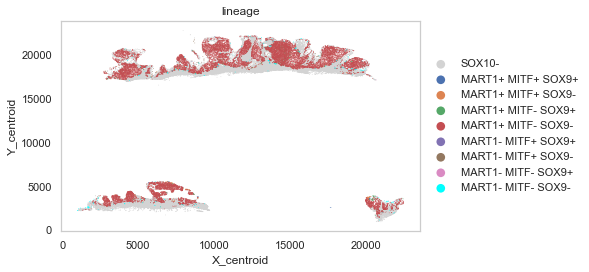

In [22]:
# Manual visualization - per patient
patient = 'LSP11355'
data = adata_new[adata_new.obs.imageid == patient]
print(f'Patient ID: {patient}')
scanpy.pl.scatter(data,x='X_centroid',y='Y_centroid',color='lineage', show=False)
ax = plt.gca()
#ax.axhline(y=20000, color='k', linestyle='--') # use this value to gate
#ax.axvline(x=32000, color='k', linestyle='--') # use this value to gate

In [23]:
# comments indicate which lesions to exclude from tumor analysis
full_disjoint_tissue_samples_dict = {'LSP11563': (12500, 'Y_centroid_gate'), # drop lower split
                                    'LSP11523': (2000, 'Y_centroid_gate'), # drop lower split
                                    'LSP11587': (12500, 'Y_centroid_gate'),
                                    'LSP11747': (21000, 'Y_centroid_gate'), # drop lower split

                                    'LSP11411': (20000, 'Y_centroid_gate'), # check lower split, Y_centroid <= 1000
                                    
                                    'LSP11691': (22000, 'X_centroid_gate'),
                                    
                                    # LSP11483 - REMOVE from all analysis

                                    # LSP11595 - continguous lesion, no splitting needed

                                    'LSP11627': (10000, 'Y_centroid_gate'),

                                    'LSP11315': (15000, 'X_centroid_gate'), # check both splits, Y_centroid <= 1000

                                    'LSP11419': (15000, 'X_centroid_gate'),

                                    'LSP11355': (10000, 'Y_centroid_gate'), # additional vertical split on lower split

                                    'LSP11387': (28000, 'X_centroid_gate'), # check left split, Y_centroid <= 1000
                                    'LSP11403': (20000, 'Y_centroid_gate'),

                                    # LSP11339 - contiguous lesion, no splitting needed

                                    'LSP11667': (12500, 'Y_centroid_gate'), # drop lower split, confirm

                                    # LSP11347 - CUT MANUALLY

                                    'LSP11395': (13600, 'Y_centroid_gate'),

                                    # LSP11467 - REMOVE from all analysis

                                    'LSP12422': (15000, 'X_centroid_gate'),

                                    'LSP11643': (32000, 'X_centroid_gate'), # drop left split (unannotated scar tissue)
                                    
                                    'LSP11515': (20000, 'Y_centroid_gate'), # drop upper split
                                }

In [92]:
def split_two_tissue_slices(adata, patient, gate, X_centroid_gate=None, Y_centroid_gate=None):
    if X_centroid_gate and Y_centroid_gate:
        raise ValueError("Please supply only one axis to gate on.")
    patient_condition = adata.obs.imageid == patient
    meta = adata.obs.copy() # convert to pandas df
    meta['imageid'] = meta['imageid'].astype(str) # convert elements from Categorical to str
    
    if X_centroid_gate:
        gate_condition = adata.obs.X_centroid > gate
        condition = patient_condition & gate_condition
        meta.loc[meta[condition].index, 'imageid'] = f'{patient}_right'

        gate_condition = adata.obs.X_centroid < gate
        condition = patient_condition & gate_condition
        meta.loc[meta[condition].index, 'imageid'] = f'{patient}_left'
    elif Y_centroid_gate:
        gate_condition = adata.obs.Y_centroid > gate
        condition = patient_condition & gate_condition
        meta.loc[meta[condition].index, 'imageid'] = f'{patient}_upper'

        gate_condition = adata.obs.Y_centroid < gate
        condition = patient_condition & gate_condition
        meta.loc[meta[condition].index, 'imageid'] = f'{patient}_lower'
    
    meta['imageid'] = meta['imageid'].astype('category')
    adata.obs = meta.copy()

    return adata

In [25]:
adata_new.obs['imageid_raw'] = adata_new.obs['imageid']

for patient, values in full_disjoint_tissue_samples_dict.items():
    if len(values) == 0:
        continue
    else:
        gate = values[0]
        if values[1] == 'X_centroid_gate':
            adata_new = split_two_tissue_slices(adata_new, patient, gate, X_centroid_gate=True)
        elif values[1] == 'Y_centroid_gate':
            adata_new = split_two_tissue_slices(adata_new, patient, gate, Y_centroid_gate=True)

patient_ids = adata_new.obs.imageid.unique().tolist()
print(patient_ids, end='')

['LSP11563_lower', 'LSP11563_upper', 'LSP11523_lower', 'LSP11523_upper', 'LSP11587_lower', 'LSP11587_upper', 'LSP11747_lower', 'LSP11747_upper', 'LSP11411_lower', 'LSP11411_upper', 'LSP11691_left', 'LSP11691_right', 'LSP11483', 'LSP11595', 'LSP11627_lower', 'LSP11627_upper', 'LSP11315_left', 'LSP11315_right', 'LSP11419_right', 'LSP11419_left', 'LSP11355_lower', 'LSP11355_upper', 'LSP11387_left', 'LSP11387_right', 'LSP11403_lower', 'LSP11403_upper', 'LSP11339', 'LSP11667_lower', 'LSP11667_upper', 'LSP11347', 'LSP11395_lower', 'LSP11395_upper', 'LSP11467', 'LSP12422_left', 'LSP12422_right', 'LSP11643_left', 'LSP11643_right', 'LSP11515_lower', 'LSP11515_upper']

In [26]:
adata_new = split_two_tissue_slices(adata_new, 'LSP11355_lower', 15000, X_centroid_gate=True)

In [27]:
# add manually cut ROI for sample LSP11347
meta = adata_new.obs.copy() # convert to pandas df
meta['imageid'] = meta['imageid'].astype(str)
lesion_a_condition = adata_new.obs['ROI_LSP11347'] == 'lesion_a'
lesion_b_condition = adata_new.obs['ROI_LSP11347'] == 'lesion_b'
meta.loc[meta[lesion_a_condition].index, 'imageid'] = 'LSP11347_lesion_a'
meta.loc[meta[lesion_b_condition].index, 'imageid'] = 'LSP11347_lesion_b'
meta['imageid'] = meta['imageid'].astype('category')
meta = meta.drop(columns=['ROI_LSP11347'])
adata_new.obs = meta.copy()

In [28]:
for patient in ['LSP11563_lower', 'LSP11523_lower', 'LSP11747_lower', 'LSP11483', 'LSP11667_lower', 'LSP11467', 'LSP11643_left', 'LSP11515_upper', 'LSP11347']:
    adata_new = adata_new[adata_new.obs['imageid'] != patient]

In [29]:
adata_new.obs.imageid.unique().to_list()

['LSP11563_upper',
 'LSP11523_upper',
 'LSP11587_lower',
 'LSP11587_upper',
 'LSP11747_upper',
 'LSP11411_lower',
 'LSP11411_upper',
 'LSP11691_left',
 'LSP11691_right',
 'LSP11595',
 'LSP11627_lower',
 'LSP11627_upper',
 'LSP11315_left',
 'LSP11315_right',
 'LSP11419_right',
 'LSP11419_left',
 'LSP11355_lower_left',
 'LSP11355_lower_right',
 'LSP11355_upper',
 'LSP11387_left',
 'LSP11387_right',
 'LSP11403_lower',
 'LSP11403_upper',
 'LSP11339',
 'LSP11667_upper',
 'LSP11347_lesion_b',
 'LSP11347_lesion_a',
 'LSP11395_lower',
 'LSP11395_upper',
 'LSP12422_left',
 'LSP12422_right',
 'LSP11643_right',
 'LSP11515_lower']

### Exclude remaining artifacts

- LSP11411_lower, LSP11315_left, LSP11315_right, LSP11387_left, LSP11643_right
- 11355_lower_right - remove rows with X_centroid < 18000

Patient ID: LSP11643_right


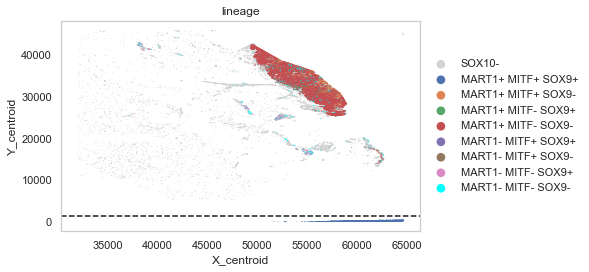

In [30]:
# Manual visualization - per sample
patient = 'LSP11643_right'
data = adata_new[adata_new.obs.imageid == patient]
print(f'Patient ID: {patient}')
scanpy.pl.scatter(data,x='X_centroid',y='Y_centroid',color='lineage', show=False)
ax = plt.gca()
ax.axhline(y=1500, color='k', linestyle='--') # use this value to gate
#ax.axvline(x=32000, color='k', linestyle='--') # use this value to gate

In [31]:
artifact_samples_dict = {
                        'LSP11411_lower': (1500, 'Y_centroid_gate'), # drop lower split

                        'LSP11315_left': (1750, 'Y_centroid_gate'), # drop lower split

                        'LSP11315_right': (1000, 'Y_centroid_gate'), # drop lower split

                        'LSP11387_left': (1200, 'Y_centroid_gate'), # drop lower split

                        'LSP11643_right': (1500, 'Y_centroid_gate'), # drop lower split

                        'LSP11355_lower_right': (18000, 'X_centroid_gate') # drop left split
                        }

In [32]:
for patient, values in artifact_samples_dict.items():
    if len(values) == 0:
        continue
    else:
        gate = values[0]
        if values[1] == 'X_centroid_gate':
            adata_new = split_two_tissue_slices(adata_new, patient, gate, X_centroid_gate=True)
        elif values[1] == 'Y_centroid_gate':
            adata_new = split_two_tissue_slices(adata_new, patient, gate, Y_centroid_gate=True)

patient_ids = adata_new.obs.imageid.unique().tolist()
print(patient_ids, end='')

['LSP11563_upper', 'LSP11523_upper', 'LSP11587_lower', 'LSP11587_upper', 'LSP11747_upper', 'LSP11411_lower_lower', 'LSP11411_lower_upper', 'LSP11411_upper', 'LSP11691_left', 'LSP11691_right', 'LSP11595', 'LSP11627_lower', 'LSP11627_upper', 'LSP11315_left_lower', 'LSP11315_right_lower', 'LSP11315_right_upper', 'LSP11315_left_upper', 'LSP11419_right', 'LSP11419_left', 'LSP11355_lower_left', 'LSP11355_lower_right_right', 'LSP11355_lower_right_left', 'LSP11355_upper', 'LSP11387_left_lower', 'LSP11387_left_upper', 'LSP11387_right', 'LSP11403_lower', 'LSP11403_upper', 'LSP11339', 'LSP11667_upper', 'LSP11347_lesion_b', 'LSP11347_lesion_a', 'LSP11395_lower', 'LSP11395_upper', 'LSP12422_left', 'LSP12422_right', 'LSP11643_right_upper', 'LSP11643_right_lower', 'LSP11515_lower']

In [33]:
for patient in ['LSP11411_lower_lower', 'LSP11315_left_lower', 'LSP11315_right_lower', 'LSP11387_left_lower', 'LSP11643_right_lower', 'LSP11355_lower_right_left']:
    adata_new = adata_new[adata_new.obs['imageid'] != patient]

In [46]:
len(adata_new.obs.imageid.unique().to_list())

33

In [35]:
adata_new.write_h5ad(filename='/Users/ediknovik/Dropbox/Harvard-University/Sorger-HMS-Postdoc/PCA-Melanoma-Analysis/data/reannotated_progression_ROIs/adata_e24_merged_splits_v4_09182023.h5ad')

### Visualize Samples (by lineage)

In [43]:
def plot_samples(tumor_subset=False, color_by_attribute='lineage'):
    for patient in adata_new.obs.imageid.unique():
        data = adata_new[adata_new.obs.imageid == patient]
        if tumor_subset == True:
            data = data[data.obs.lineage != 'SOX10-']
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        scanpy.pl.scatter(data,x='X_centroid',y='Y_centroid',color=color_by_attribute, ax=ax,show=False)
        ax.set_title(f'Patient {patient}', fontsize=15)

ipykernel_launcher:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


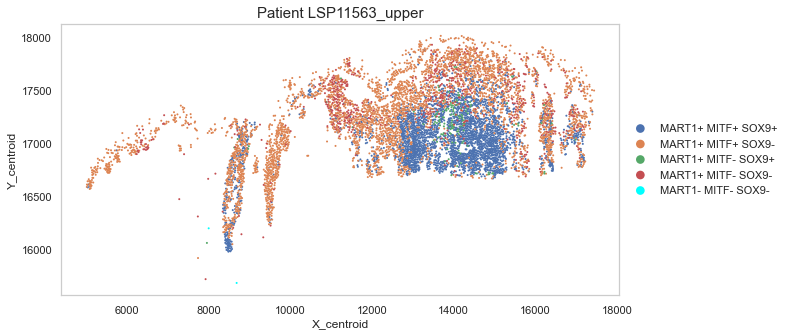

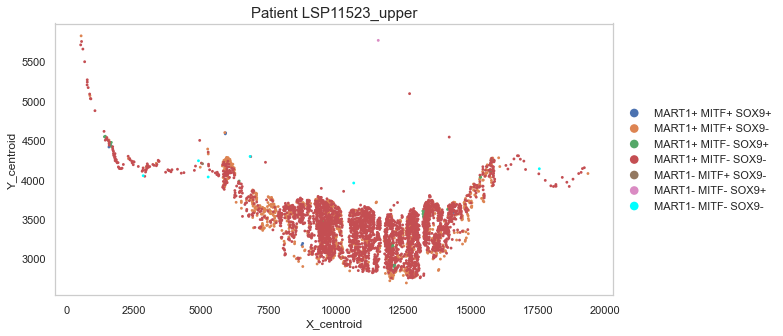

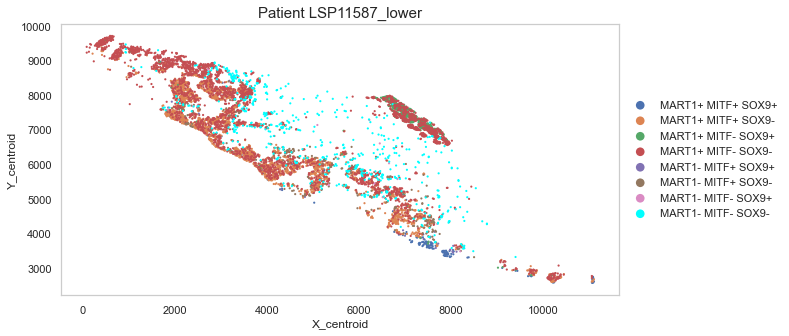

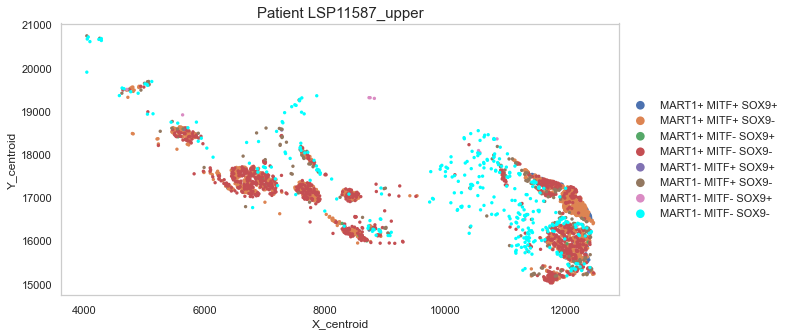

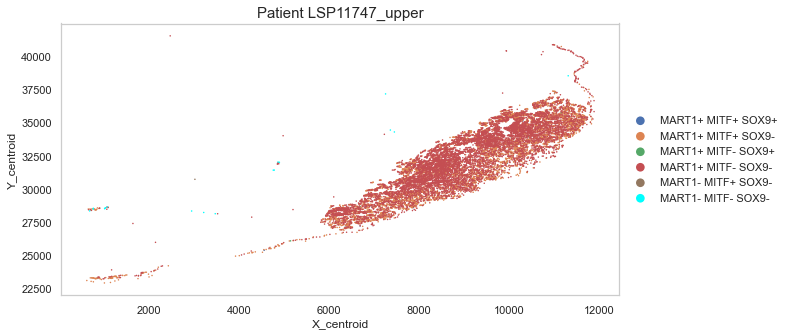

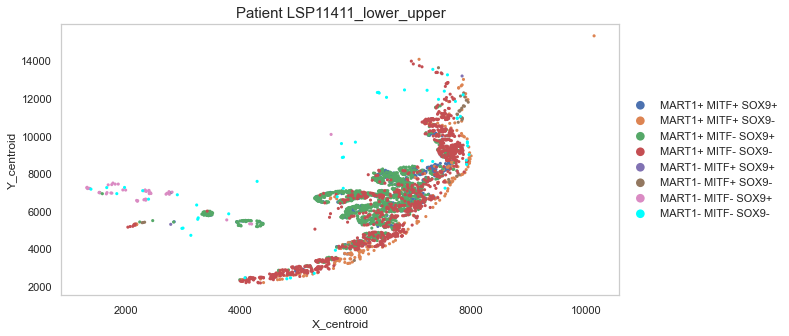

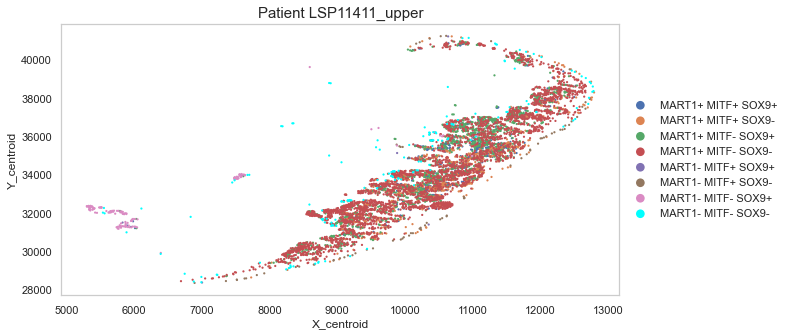

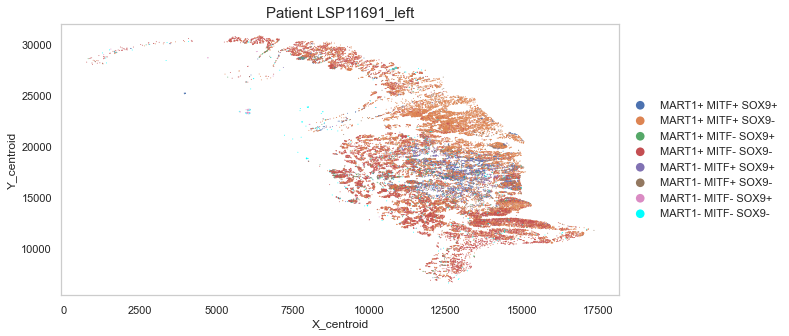

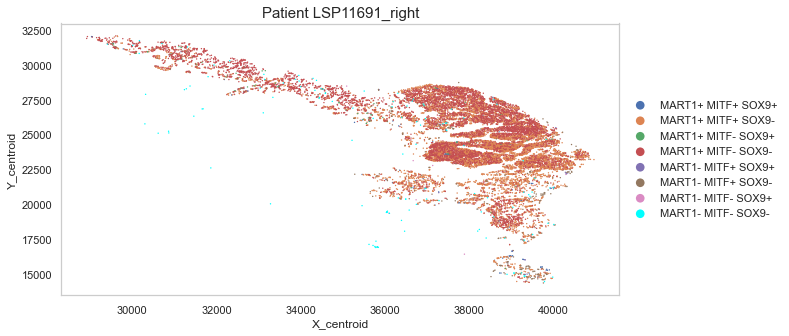

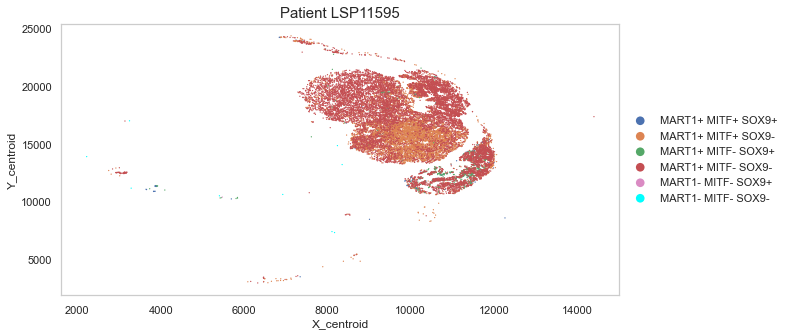

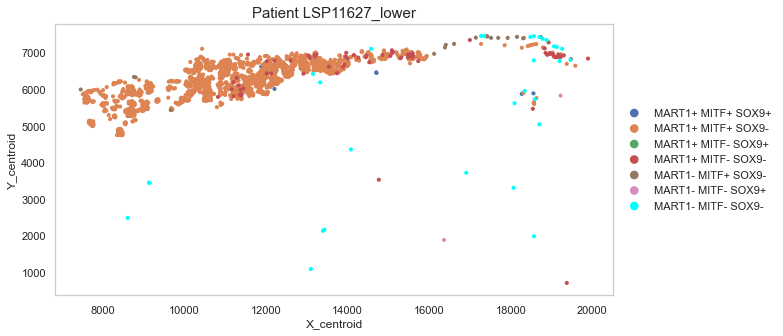

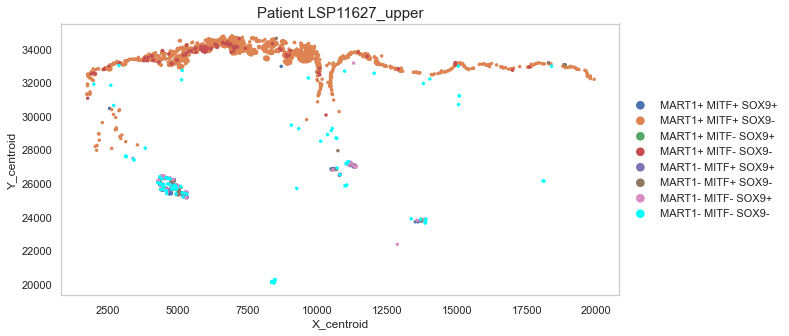

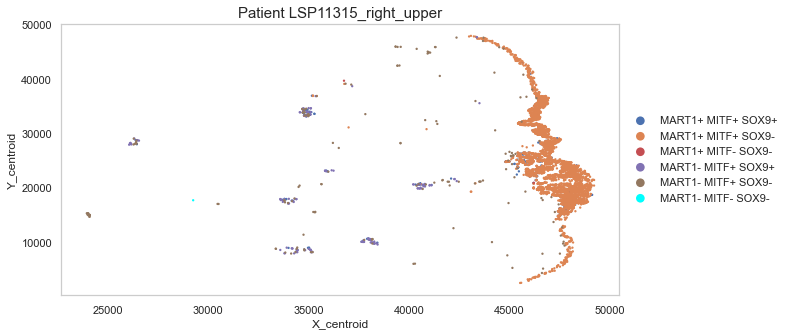

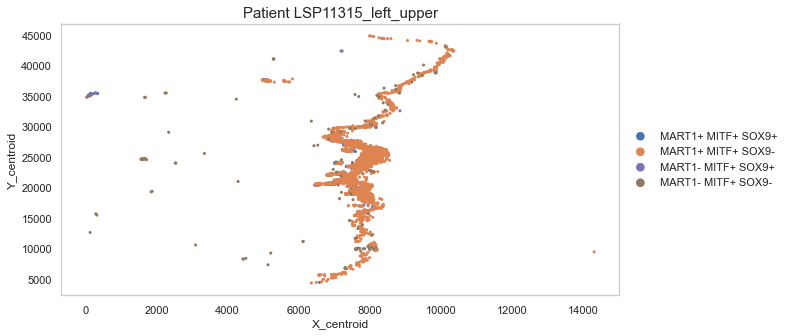

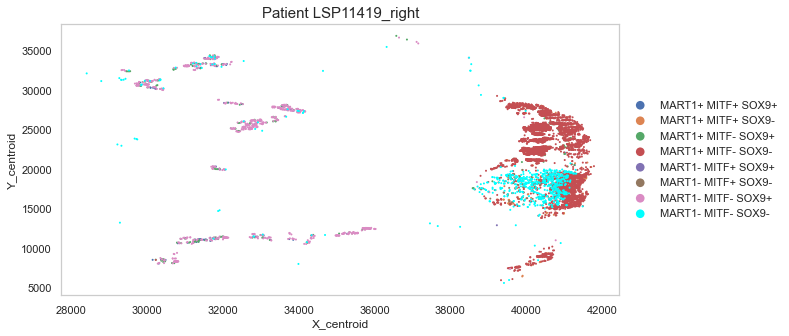

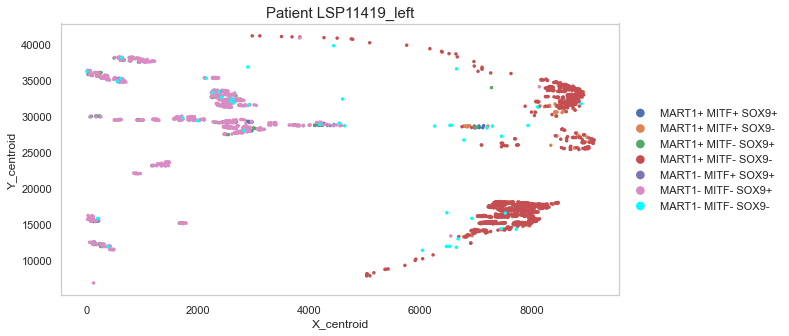

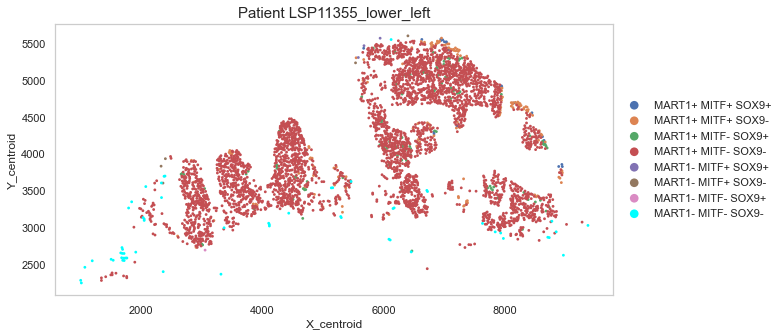

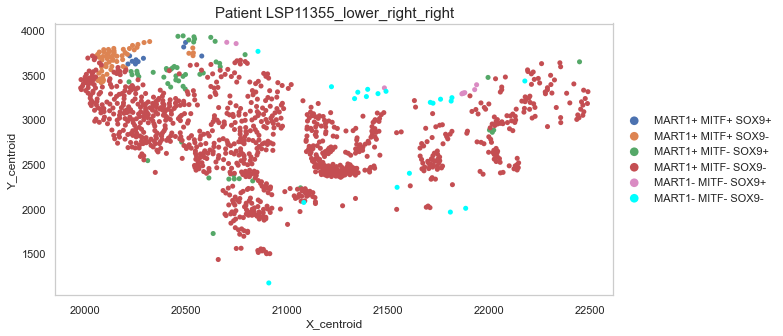

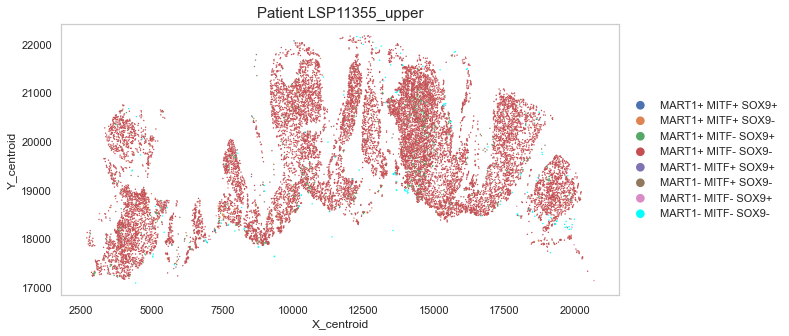

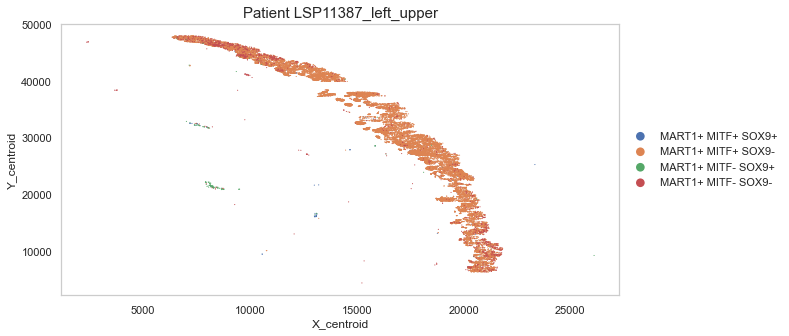

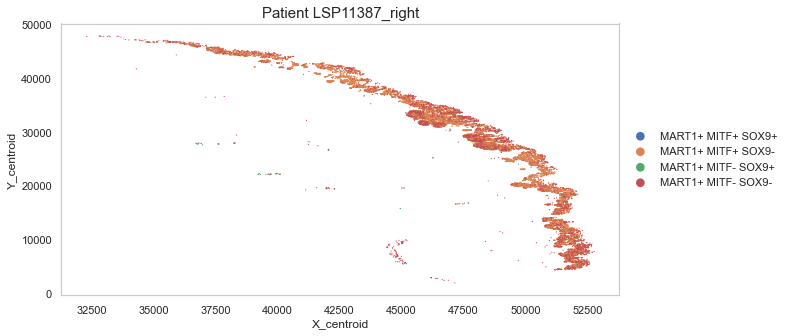

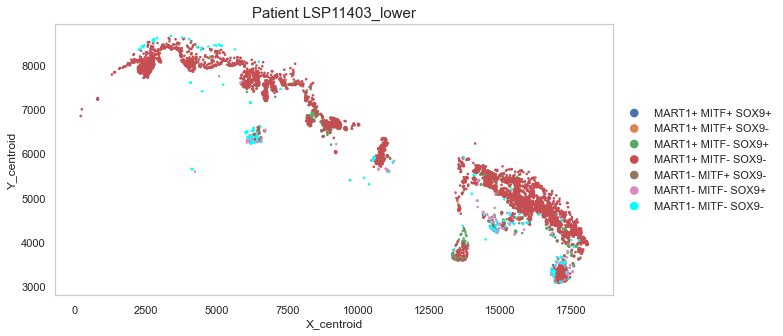

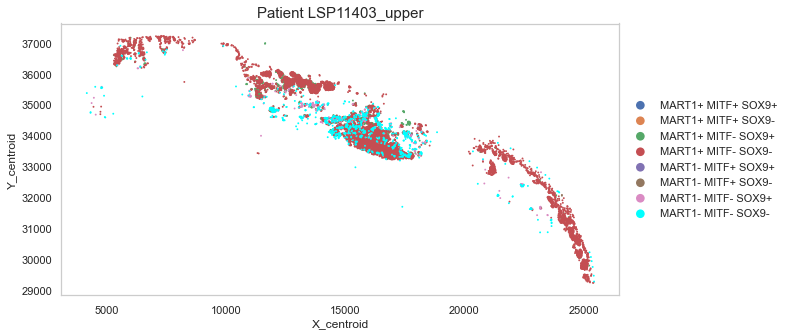

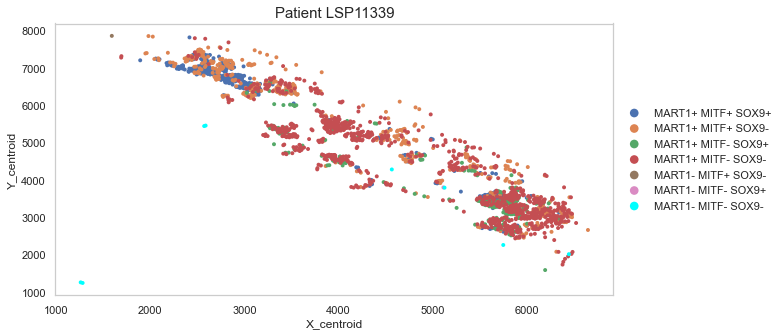

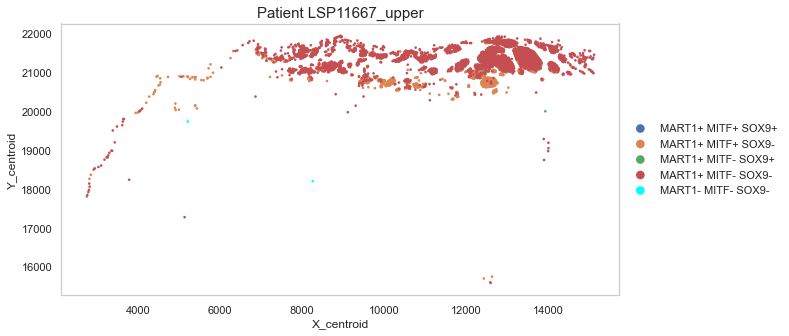

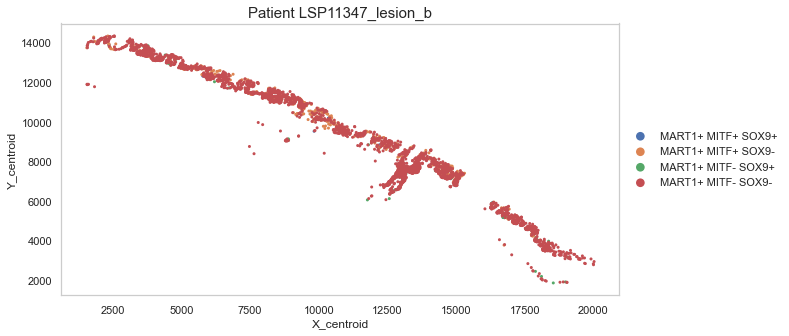

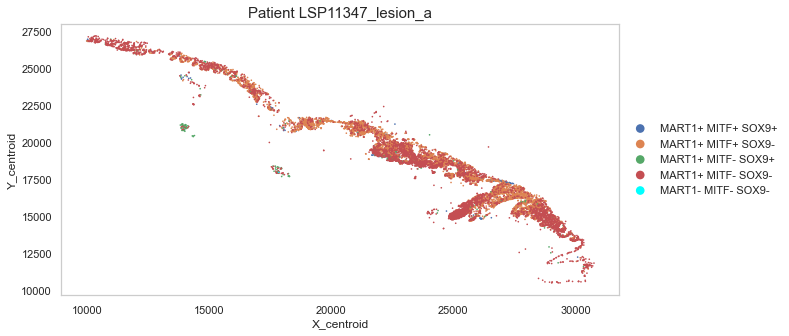

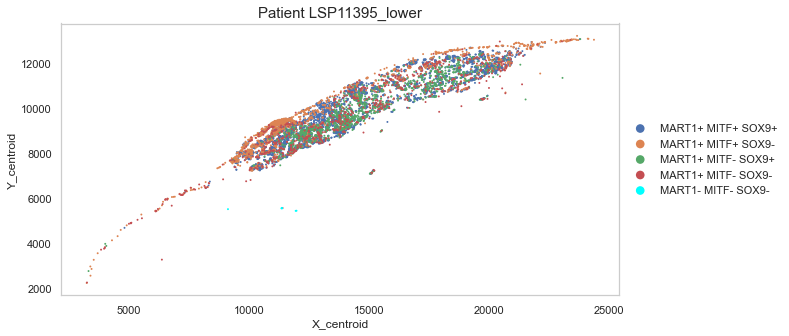

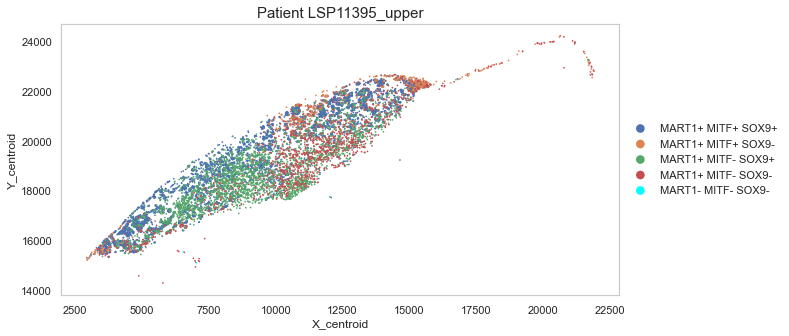

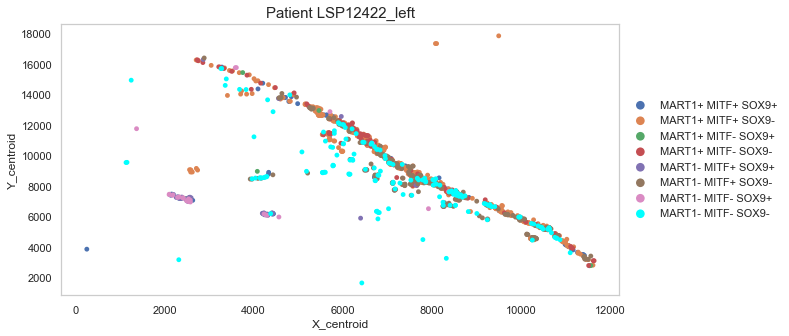

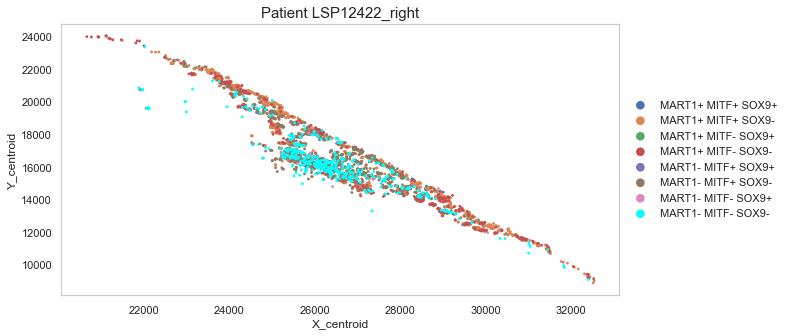

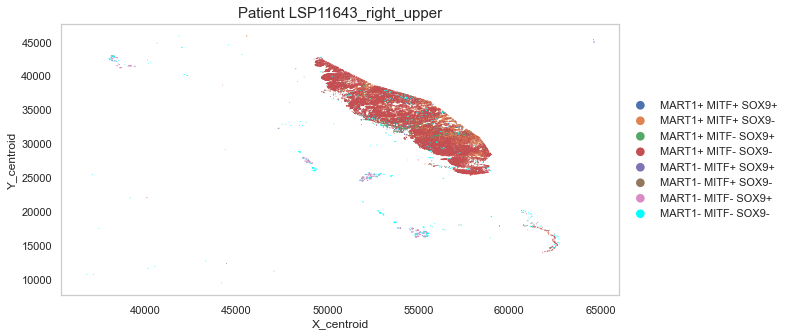

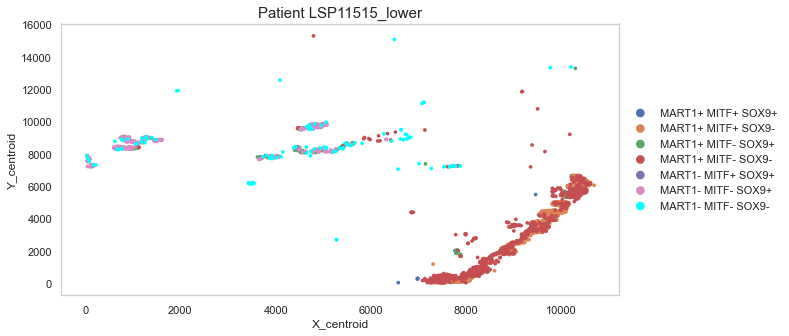

In [37]:
plot_samples(tumor_subset=True)

### Visualize samples (by grouped lineage)

Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


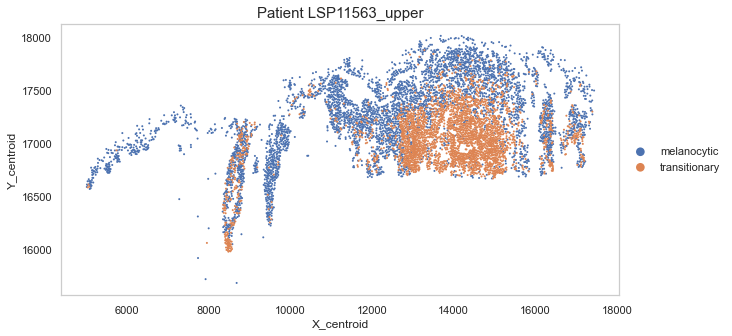

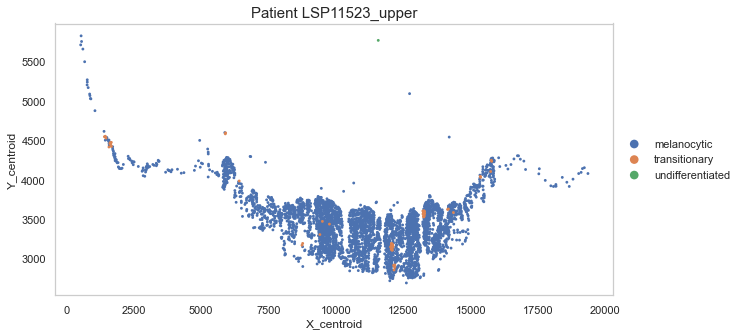

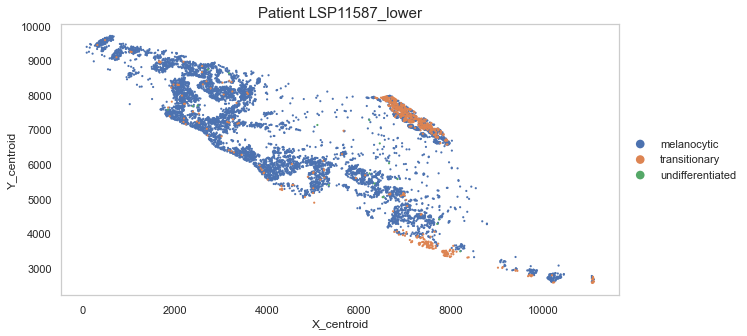

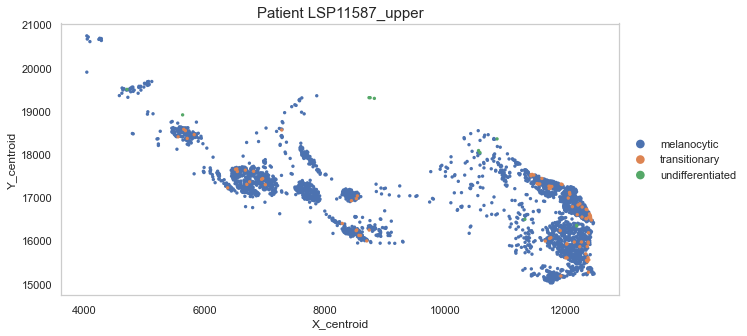

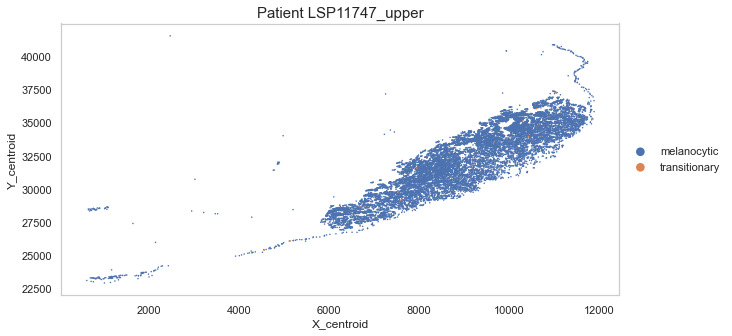

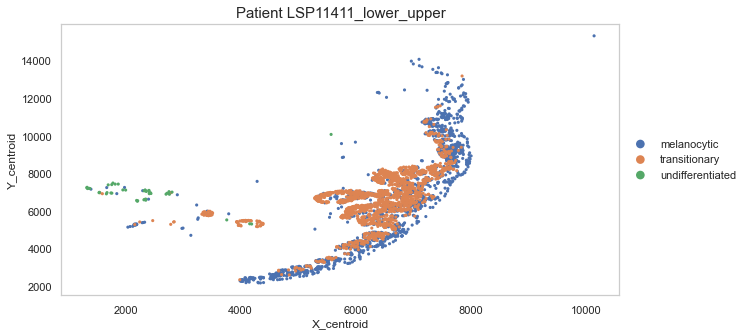

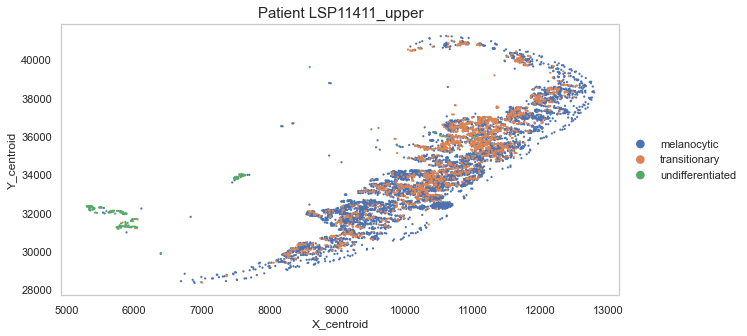

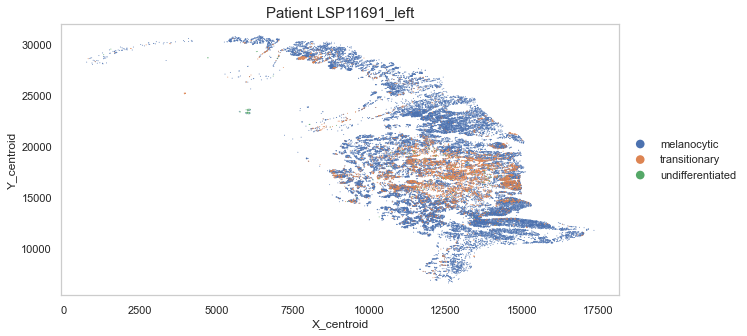

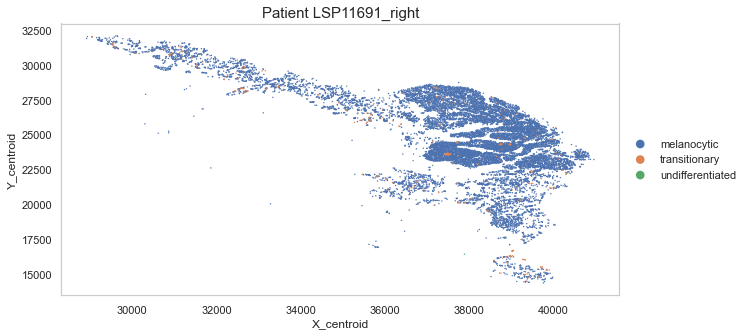

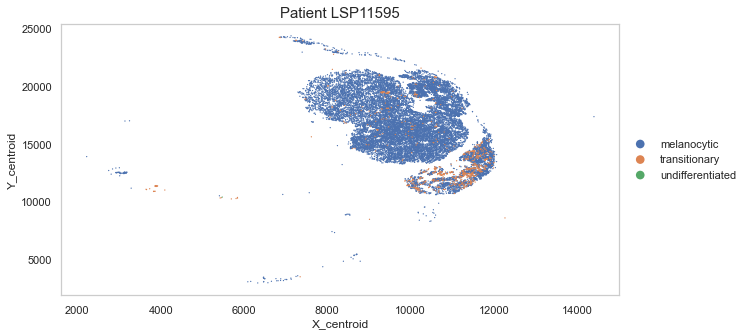

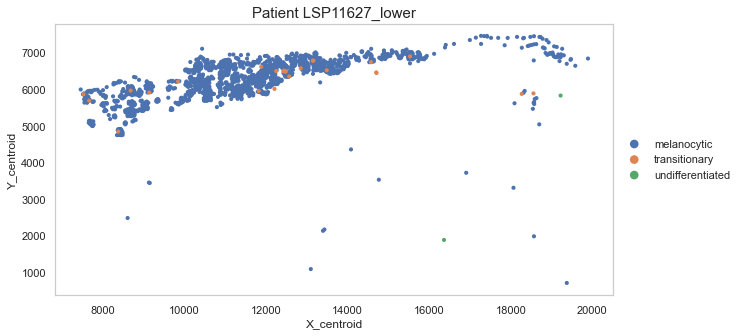

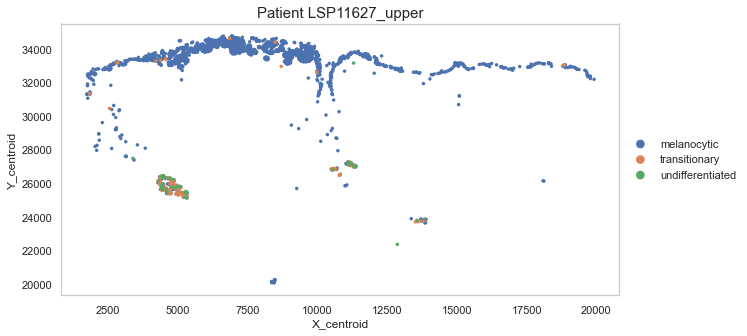

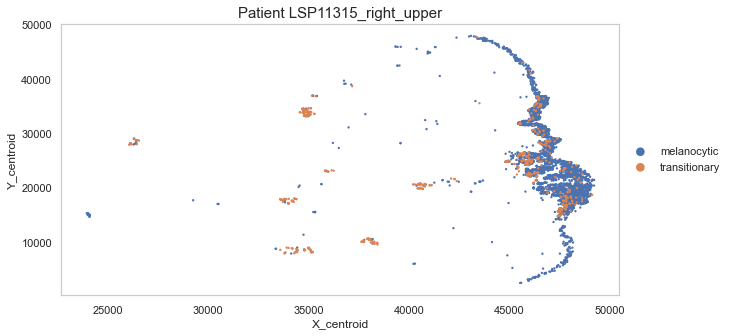

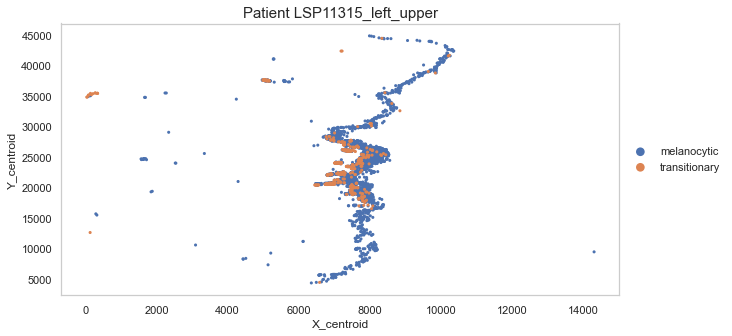

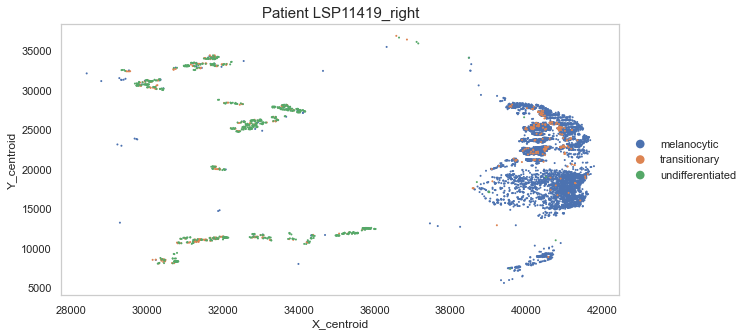

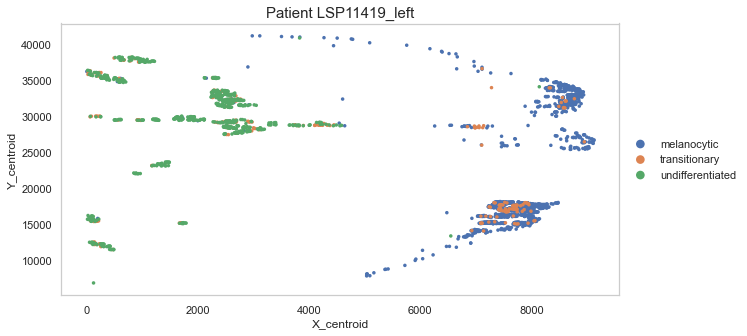

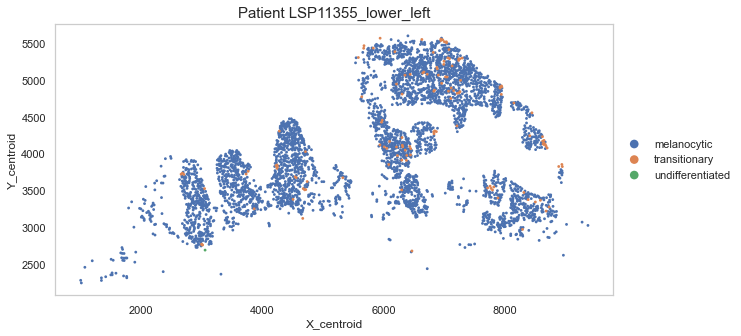

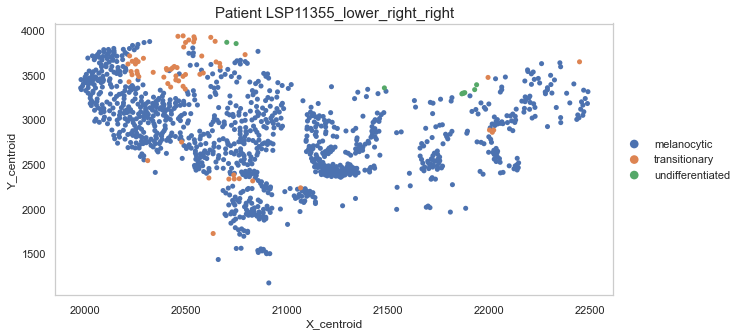

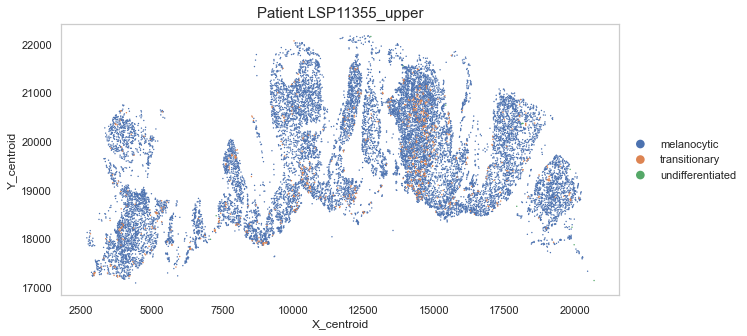

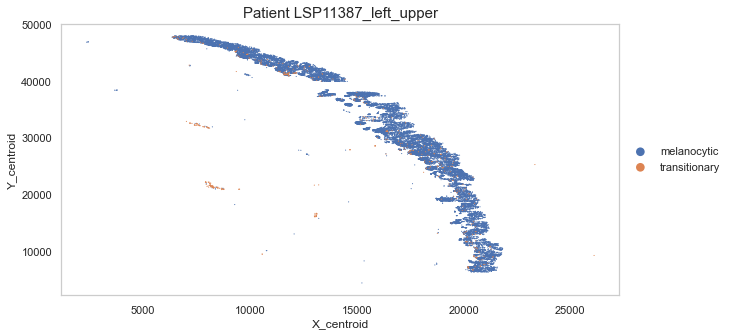

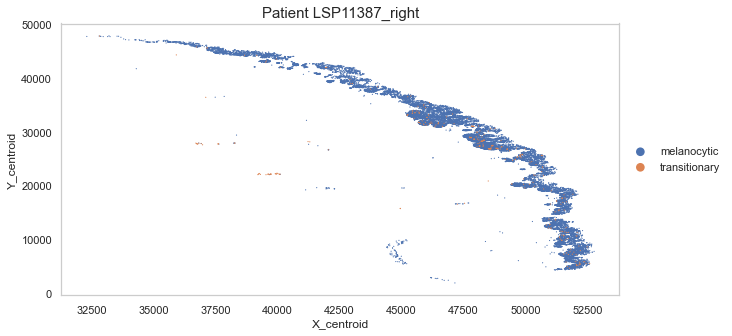

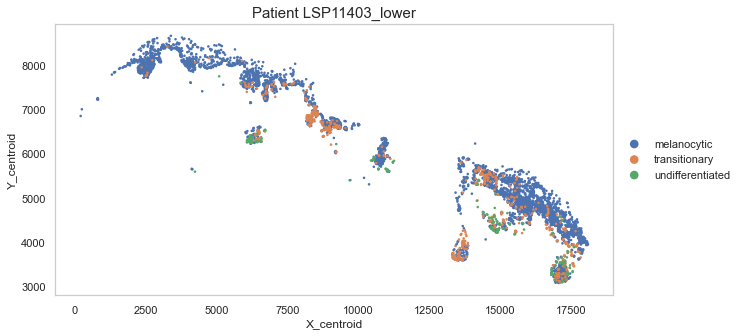

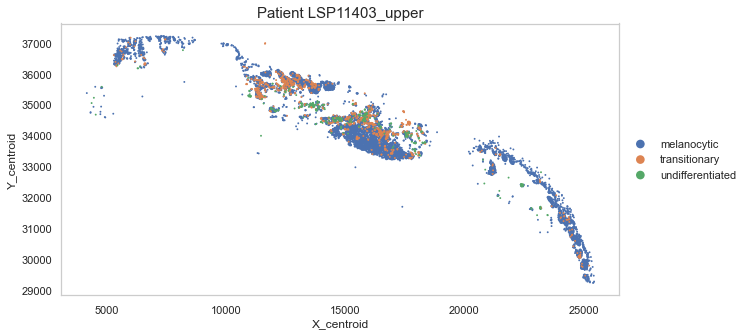

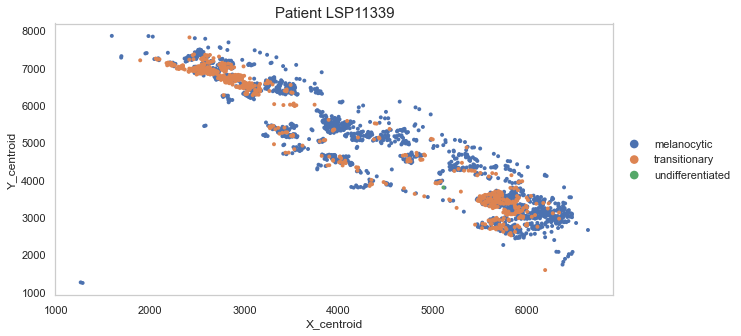

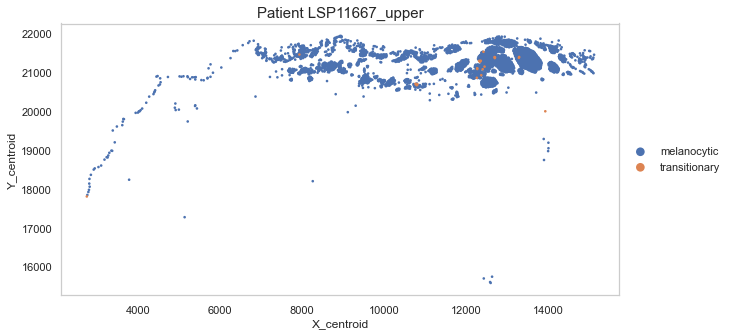

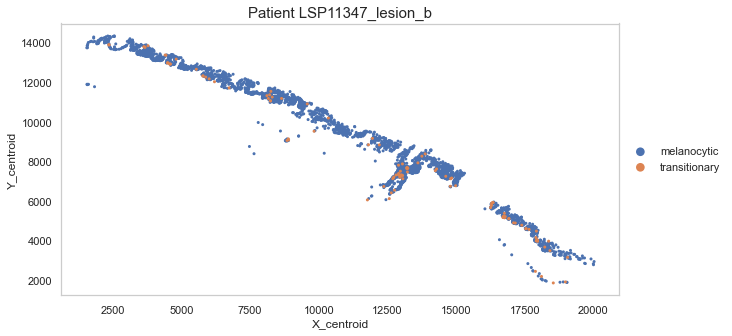

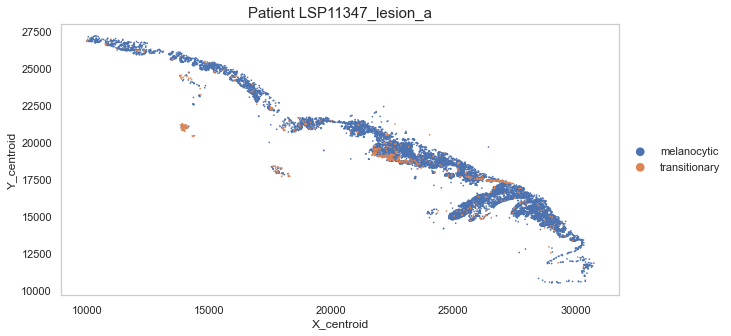

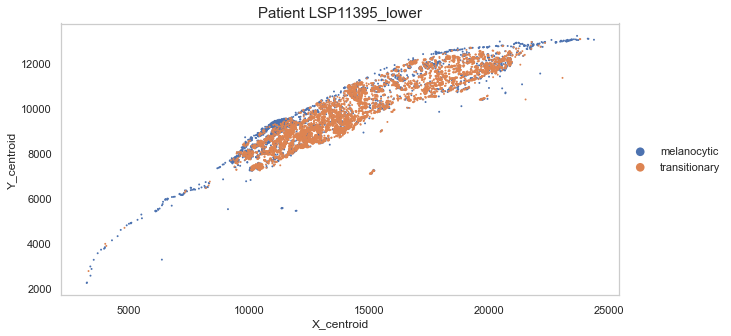

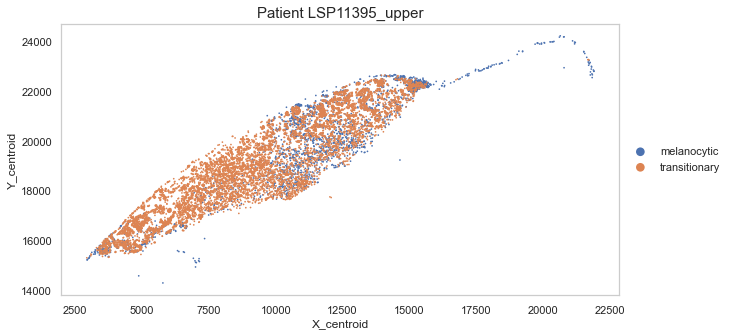

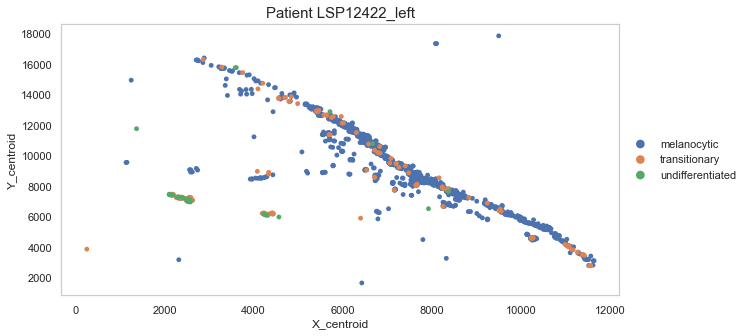

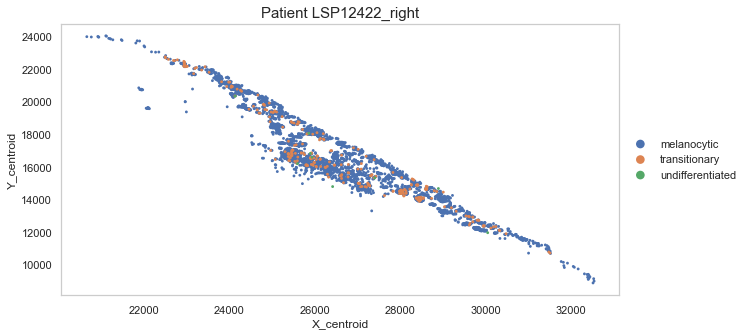

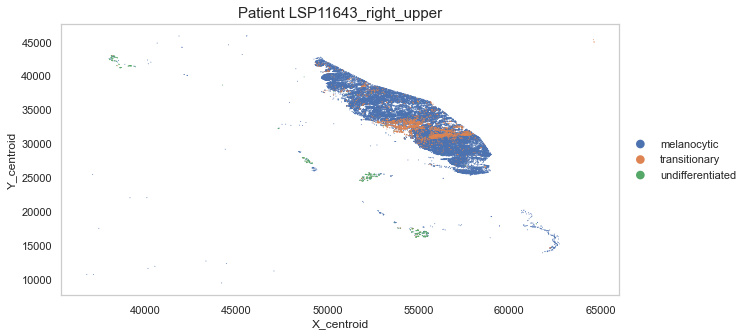

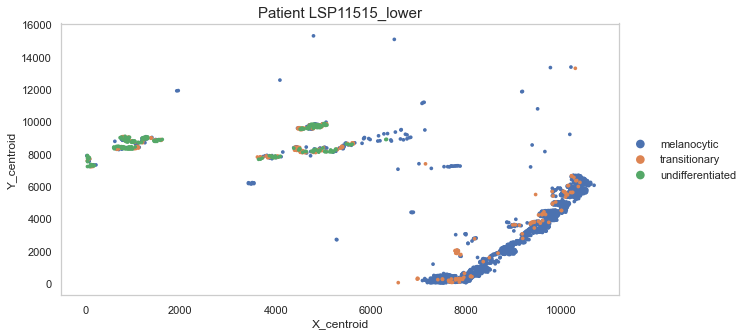

In [45]:
plot_samples(tumor_subset=True, color_by_attribute='lineage_grouped')

### Check merged adata

In [41]:
adata_new.var

Empty DataFrameView
Columns: []
Index: [DNA1, MART1, CD207, SOX10, GZMB, CD163, CD1c, KRT14, CD3e, CD11c, CD8a, aSMA, CD20, CD68, PDL1, MITF, FOXP3, PD1, panCK, CD16, CD206, CD31, Vim, S100A, LAG3, CD56, pS6, HLA-A/B, SOX9, HLA-DPB1, PCNA, CD14, CD66b, pH3, LMNB2, Nestin, H3K27Me3, PRAME, TIGIT, TIM3, CD57, cPARP, DNA13, CD4, Ki67_2, IRF1]

### Split disjoint sections on experiment 41 data

In [109]:
adata = scanpy.read_h5ad('/Users/ediknovik/Dropbox/Harvard-University/Sorger-HMS-Postdoc/PCA-Melanoma-Analysis/data/experiment_41_data/e41_tumor_12012023.h5ad')

In [110]:
adata

AnnData object with n_obs × n_vars = 168230 × 16
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'phenotype', 'MEL_id', 'B2Mpos', 'KI67pos', 'optMPIscore', 'prolif', 'MART1pos', 'PMELpos', 'SOX9pos', 'lineage', 'lineage_v2', 'prolif lineage', 'prolif_lineage_v2', 'Ki67pos', 'PCNApos', 'Ki67_PCNApos', 'ECAD_pos', 'invasion', 'MX1pos', 'IRF1pos', 'pSTAT1pos', 'IFN_signaling', 'example', 'BCL2pos', 'ECADpos', 'PRAMEpos', 'pS6pos', 'VIMpos', 'LDHpos', 'S100Bpos', 'pERKpos', 'H3k27me3pos', 'S100A1pos'
    uns: 'all_markers', 'dendrogram_lineage_v2', 'dendrogram_prolif', 'gates', 'imageid_colors', 'spatial_distance'
    obsm: 'umap', 'umap_combat'
    layers: 'combat', 'rescaled'

In [111]:
print(adata.obs.imageid.unique().tolist(), end='')

['LSP11314', 'LSP11330', 'LSP11349', 'LSP11354', 'LSP11402', 'LSP11410', 'LSP11522', 'LSP11530', 'LSP11562', 'LSP11634', 'LSP11706', 'LSP11754', 'LSP11778', 'LSP11786', 'LSP11373', 'LSP11450', 'LSP11474', 'LSP11482', 'LSP11498', 'LSP11618', 'LSP11642', 'LSP11658', 'LSP11698', 'LSP12424']

Trying to set attribute `._uns` of view, copying.


Patient ID: LSP11698


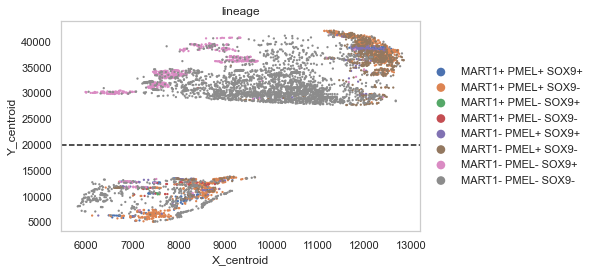

In [112]:
# Manual visualization - per patient
patient = 'LSP11698'
data = adata[adata.obs.imageid == patient]
print(f'Patient ID: {patient}')
scanpy.pl.scatter(data,x='X_centroid',y='Y_centroid',color='lineage', show=False)
ax = plt.gca()
ax.axhline(y=20000, color='k', linestyle='--') # use this value to gate
# ax.axvline(x=2500, color='k', linestyle='--') # use this value to gate

In [113]:
# comments indicate which lesions to exclude from analysis
full_disjoint_tissue_samples_dict = {
                                     'LSP11314': (30000, 'X_centroid_gate'), 
                                     'LSP11330': (20000, 'Y_centroid_gate'), 
                                     'LSP11349': (13000, 'Y_centroid_gate'), 
                                     'LSP11354': (13000, 'Y_centroid_gate'), 
                                     'LSP11402': (18000, 'Y_centroid_gate'), 
                                     'LSP11410': (18000, 'Y_centroid_gate'), 
                                     # 'LSP11522' - single section 
                                     'LSP11530': (14000, 'X_centroid_gate'), 
                                     # 'LSP11562' - single section
                                     'LSP11634': (18000, 'Y_centroid_gate'), # remove lower cut 
                                     'LSP11706': (18000, 'Y_centroid_gate'), 
                                     # 'LSP11754' - single section
                                     # 'LSP11778' - single section 
                                     # 'LSP11786' - single section
                                     'LSP11373': (9000, 'Y_centroid_gate'), # remove lower cut
                                     # 'LSP11450' - remove
                                     # 'LSP11474' - single section
                                     # 'LSP11482' - single section
                                     # 'LSP11498' - remove
                                     'LSP11618': (2500, 'X_centroid_gate'), # remove left cut
                                     # 'LSP11642' - single section 
                                     'LSP11658': (22100, 'Y_centroid_gate'),
                                     'LSP11698': (20000, 'Y_centroid_gate'), 
                                     # 'LSP12424' - single section
                                }

In [116]:
adata.obs['imageid_raw'] = adata.obs['imageid']

for patient, values in full_disjoint_tissue_samples_dict.items():
    if len(values) == 0:
        continue
    else:
        gate = values[0]
        if values[1] == 'X_centroid_gate':
            adata = split_two_tissue_slices(adata, patient, gate, X_centroid_gate=True)
        elif values[1] == 'Y_centroid_gate':
            adata = split_two_tissue_slices(adata, patient, gate, Y_centroid_gate=True)

patient_ids = adata.obs.imageid.unique().tolist()
print(patient_ids, end='')

['LSP11314_left', 'LSP11314_right', 'LSP11330_lower', 'LSP11330_upper', 'LSP11349_lower', 'LSP11349_upper', 'LSP11354_lower', 'LSP11354_upper', 'LSP11402_lower', 'LSP11402_upper', 'LSP11410_lower', 'LSP11410_upper', 'LSP11522', 'LSP11530_left', 'LSP11530_right', 'LSP11562', 'LSP11634_lower', 'LSP11634_upper', 'LSP11706_lower', 'LSP11706_upper', 'LSP11754', 'LSP11778', 'LSP11786', 'LSP11373_lower', 'LSP11373_upper', 'LSP11450', 'LSP11474', 'LSP11482', 'LSP11498', 'LSP11618_left', 'LSP11618_right', 'LSP11642', 'LSP11658_lower', 'LSP11658_upper', 'LSP11698_lower', 'LSP11698_upper', 'LSP12424']

In [117]:
for patient in ['LSP11634_lower', 'LSP11373_lower', 'LSP11618_left', 'LSP11450', 'LSP11498']:
    adata = adata[adata.obs['imageid'] != patient]

In [119]:
print(adata.obs.imageid.unique().tolist())
print(len(adata.obs.imageid.unique().tolist()))

['LSP11314_left', 'LSP11314_right', 'LSP11330_lower', 'LSP11330_upper', 'LSP11349_lower', 'LSP11349_upper', 'LSP11354_lower', 'LSP11354_upper', 'LSP11402_lower', 'LSP11402_upper', 'LSP11410_lower', 'LSP11410_upper', 'LSP11522', 'LSP11530_left', 'LSP11530_right', 'LSP11562', 'LSP11634_upper', 'LSP11706_lower', 'LSP11706_upper', 'LSP11754', 'LSP11778', 'LSP11786', 'LSP11373_upper', 'LSP11474', 'LSP11482', 'LSP11618_right', 'LSP11642', 'LSP11658_lower', 'LSP11658_upper', 'LSP11698_lower', 'LSP11698_upper', 'LSP12424']
32


In [121]:
adata.write_h5ad(filename='/Users/ediknovik/Dropbox/Harvard-University/Sorger-HMS-Postdoc/PCA-Melanoma-Analysis/data/experiment_41_data/e41_tumor_splits_v2_01102024.h5ad')